In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [5]:
X= df.drop("sales", axis = 1)
y = df['sales']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
model.score(X_test,y_test), model.score(X_train,y_train)

(0.9185780903322446, 0.8856665510409361)

In [10]:
model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

In [11]:
predication = model.predict(X_test) 
predication_X_train = model.predict(X_train)

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [13]:
MSE_X_test = mean_squared_error(y_test,predication)
MSE_X_train = mean_squared_error(y_train,predication_X_train)
MSE_X_test, MSE_X_train
# here the test_MSE is smaller than train_MSE. hence we can say that the model is not overfitted

(np.float64(2.298716697886378), np.float64(3.008816776157995))

In [14]:
#RMSE
RMSE= np.sqrt(mean_squared_error(y_test,predication))
RMSE

np.float64(1.5161519375993877)

**Residual Error**

In [15]:
test_residual = y_test- predication

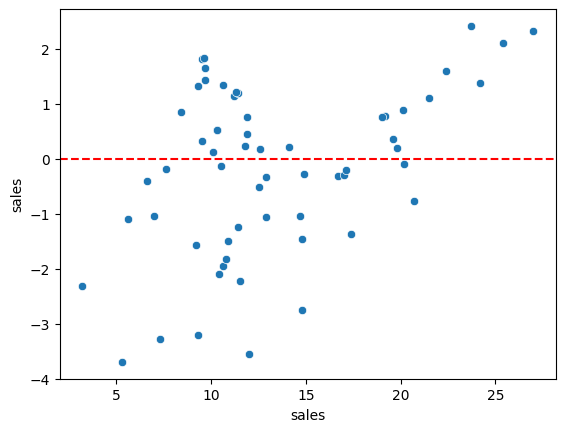

In [16]:
sns.scatterplot(x= y_test, y= test_residual)
plt.axhline(y =0,ls='--',color='r')
plt.show()

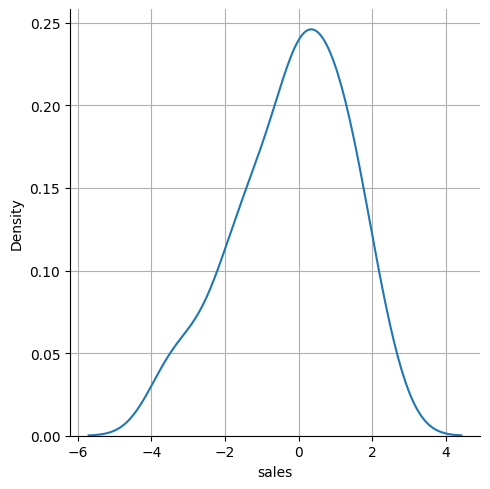

In [17]:
sns.displot(x=test_residual,kind="kde")
plt.grid()

In [18]:
final_model = LinearRegression()
final_model

LinearRegression()

In [19]:
final_model.fit(X,y)
y_hat = final_model.predict(X)

In [20]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

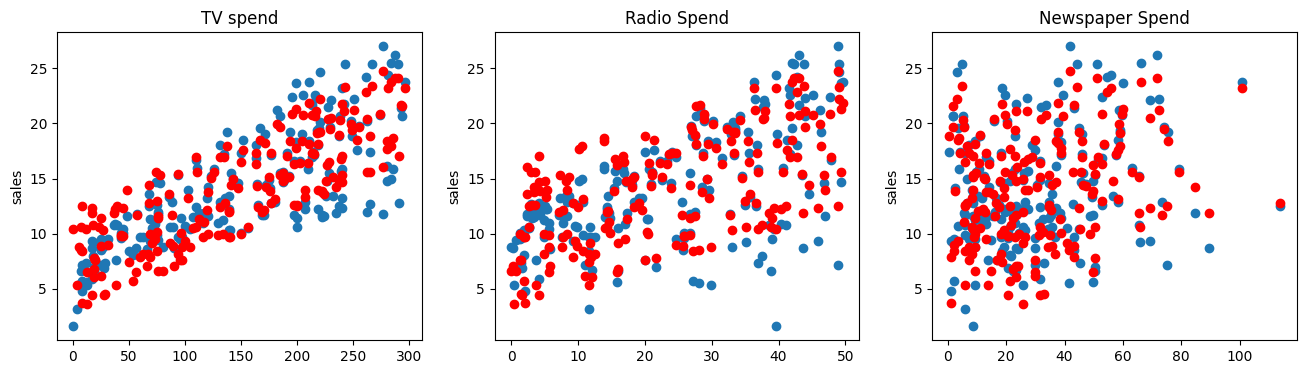

In [21]:
fig, axes= plt.subplots(nrows=1,ncols=3,figsize=(16,4))
axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='r')
axes[0].set_ylabel("sales")
axes[0].set_title("TV spend")
axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='r')
axes[1].set_ylabel("sales")
axes[1].set_title("Radio Spend")
axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_ylabel("sales")
axes[2].set_title("Newspaper Spend")
plt.show()

**Deploy the Model**

In [22]:
from joblib import dump, load

In [23]:
dump(model,"adversiting_sales_model.joblib")

['adversiting_sales_model.joblib']

In [24]:
loded_model= load("adversiting_sales_model.joblib")

In [25]:
loded_model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

- lets say someone asks me to predict as:
- what sales will I make if I spend 200 units in TV, 400 units in radio and 50 units in newspaper?

In [26]:
X.shape

(200, 3)

In [28]:
campaign =[[200,400,50]]
loded_model.predict(campaign)


C:\Users\mohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([87.10086851])

- with the RMSE of 1.360 I can conclude that
- with the spend of unit as tv->200,radio->400 and newspaper -> 50
- I can make $87 \pm 1.360 \sim 88 \ to \  86 $ sales